In [412]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

In [413]:
df = df_test = pd.read_csv('Data/listings_merged.csv')
df

,id,name,description,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,region
0,4.886140e+05,Apartamento acogedor y luminoso en Hendaya,"T2. Charming, cosy and bright apartment, with...",entire rental unit,entire home/apt,4,1.0,1.0,1,"[""hair dryer"", ""essentials"", ""dishes and silve...",...,52,4.850000,4.880000,4.730000,4.980000,4.980000,4.770000,4.790000,0.390000,64
1,5.079790e+05,On the riverbanks of l'Adour,This apartment is ideally situated just a step...,entire rental unit,entire home/apt,8,1.0,3.0,5,"[""dishes and silverware"", ""oven"", ""refrigerato...",...,46,4.570000,4.600000,4.310000,4.640000,4.710000,4.710000,4.440000,0.350000,64
2,3.523810e+05,[DeepCleaned] ★ 2BR duplex ★ near BEACH & FOREST,- Looking for a comfortable self-catering flat...,entire rental unit,entire home/apt,5,1.0,2.0,3,"[""hair dryer"", ""baby bath"", ""dishes and silver...",...,54,4.890000,4.930000,4.830000,4.890000,4.960000,4.740000,4.590000,0.540000,64
3,5.146520e+05,2-bedroom flat in central Biarritz,Roomy and luminous apartment located on the FO...,entire rental unit,entire home/apt,4,1.0,2.0,3,"[""hair dryer"", ""essentials"", ""microwave"", ""dis...",...,98,4.900000,4.950000,4.950000,5.000000,4.990000,4.880000,4.800000,0.670000,64
4,4.670580e+05,FLAT IN SAINT JEAN DE LUZ 4 PERSONS,NaN,entire rental unit,entire home/apt,4,1.0,1.0,2,"[""hair dryer"", ""essentials"", ""clothing storage...",...,227,4.710000,4.810000,4.770000,4.920000,4.910000,4.950000,4.600000,1.540000,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30170,1.238564e+18,Canal Saint Martin apartment,Enjoy a stylish experience at this centrally l...,entire rental unit,entire home/apt,4,1.0,1.0,1,"[""coffee maker"", ""oven"", ""laundromat nearby"", ...",...,0,4.717753,4.767341,4.651712,4.801212,4.825401,4.814543,4.622334,1.091909,IDF
30171,1.238569e+18,"Spacieux studio 4P, porte st cloud",Forget your worries at this spacious (42m2) an...,entire rental unit,entire home/apt,4,1.0,1.0,2,"[""hot water"", ""stove"", ""coffee maker"", ""cleani...",...,1,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,IDF
30172,1.238756e+18,[F-16] 파리 5인여성 다인실방,Centrally located with the best accessibility.,shared room in rental unit,shared room,1,1.0,NaN,1,"[""wifi"", ""dedicated workspace""]",...,0,4.717753,4.767341,4.651712,4.801212,4.825401,4.814543,4.622334,1.091909,IDF
30173,1.239121e+18,Large and bright flat nearby Montmartre - Paris,MIDTERM STAY ONLY - Located close to the mythi...,entire rental unit,entire home/apt,1,1.0,NaN,2,"[""hot water"", ""coffee maker"", ""dishes and silv...",...,0,4.717753,4.767341,4.651712,4.801212,4.825401,4.814543,4.622334,1.091909,IDF


In [414]:
df.isnull().sum()

id                                  0
name                                0
description                       884
property_type                       0
room_type                           0
accommodates                        0
bathrooms                          13
bedrooms                          110
beds                                0
amenities                           0
price                               0
latitude                            0
longitude                           0
neighbourhood_cleansed              0
neighbourhood_group_cleansed    19179
minimum_nights                      0
maximum_nights                      0
availability_30                     0
availability_60                     0
availability_90                     0
availability_365                    0
number_of_reviews                   0
review_scores_rating                0
review_scores_accuracy              0
review_scores_cleanliness           0
review_scores_checkin               0
review_score

In [415]:
# df["price"] = df["price"].str.replace('$', '').str.replace(',', '').astype(float)

In [416]:
le = LabelEncoder()
catcol = df.select_dtypes(include=['object','bool'])

for x in catcol:
    df[x] = le.fit_transform(df[x])

df

,id,name,description,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,region
0,4.886140e+05,1439,21220,18,0,4,1.0,1.0,1,9219,...,52,4.850000,4.880000,4.730000,4.980000,4.980000,4.770000,4.790000,0.390000,0
1,5.079790e+05,19504,22510,18,0,8,1.0,3.0,5,6056,...,46,4.570000,4.600000,4.310000,4.640000,4.710000,4.710000,4.440000,0.350000,0
2,3.523810e+05,27442,147,18,0,5,1.0,2.0,3,7794,...,54,4.890000,4.930000,4.830000,4.890000,4.960000,4.740000,4.590000,0.540000,0
3,5.146520e+05,569,18923,18,0,4,1.0,2.0,3,10664,...,98,4.900000,4.950000,4.950000,5.000000,4.990000,4.880000,4.800000,0.670000,0
4,4.670580e+05,13848,28142,18,0,4,1.0,1.0,2,8897,...,227,4.710000,4.810000,4.770000,4.920000,4.910000,4.950000,4.600000,1.540000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30170,1.238564e+18,7303,8646,18,0,4,1.0,1.0,1,3367,...,0,4.717753,4.767341,4.651712,4.801212,4.825401,4.814543,4.622334,1.091909,2
30171,1.238569e+18,21871,9814,18,0,4,1.0,1.0,2,17507,...,1,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,2
30172,1.238756e+18,27443,4599,64,3,1,1.0,NaN,1,27909,...,0,4.717753,4.767341,4.651712,4.801212,4.825401,4.814543,4.622334,1.091909,2
30173,1.239121e+18,16329,14678,18,0,1,1.0,NaN,2,14135,...,0,4.717753,4.767341,4.651712,4.801212,4.825401,4.814543,4.622334,1.091909,2


In [417]:
df['beds_and_baths'] = df['bedrooms'] + df['bathrooms']
corr = df.corr()
print(corr['price'])

id                              0.080882
name                           -0.049536
description                    -0.018984
property_type                  -0.321962
room_type                      -0.351785
accommodates                    0.267651
bathrooms                       0.003073
bedrooms                        0.089924
beds                            0.101841
amenities                       0.036721
price                           1.000000
latitude                        0.204226
longitude                       0.065728
neighbourhood_cleansed          0.090497
neighbourhood_group_cleansed    0.126788
minimum_nights                 -0.041047
maximum_nights                 -0.058818
availability_30                 0.059973
availability_60                 0.047776
availability_90                 0.043195
availability_365               -0.009326
number_of_reviews              -0.071103
review_scores_rating            0.024624
review_scores_accuracy          0.017189
review_scores_cl

In [418]:
df.columns

Index(['id', 'name', 'description', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price',
       'latitude', 'longitude', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month',
       'region', 'beds_and_baths'],
      dtype='object')

In [419]:
df.drop(columns=['bedrooms','bathrooms','beds', 'listing_url', 'scrape_id', 'last_scraped', 'host_id', 'description', 'name', 'neighborhood_overview', 'picture_url', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_group_cleansed', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews','number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'license', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month', 'region'],axis=1, inplace=True, errors='ignore')

<Axes: >

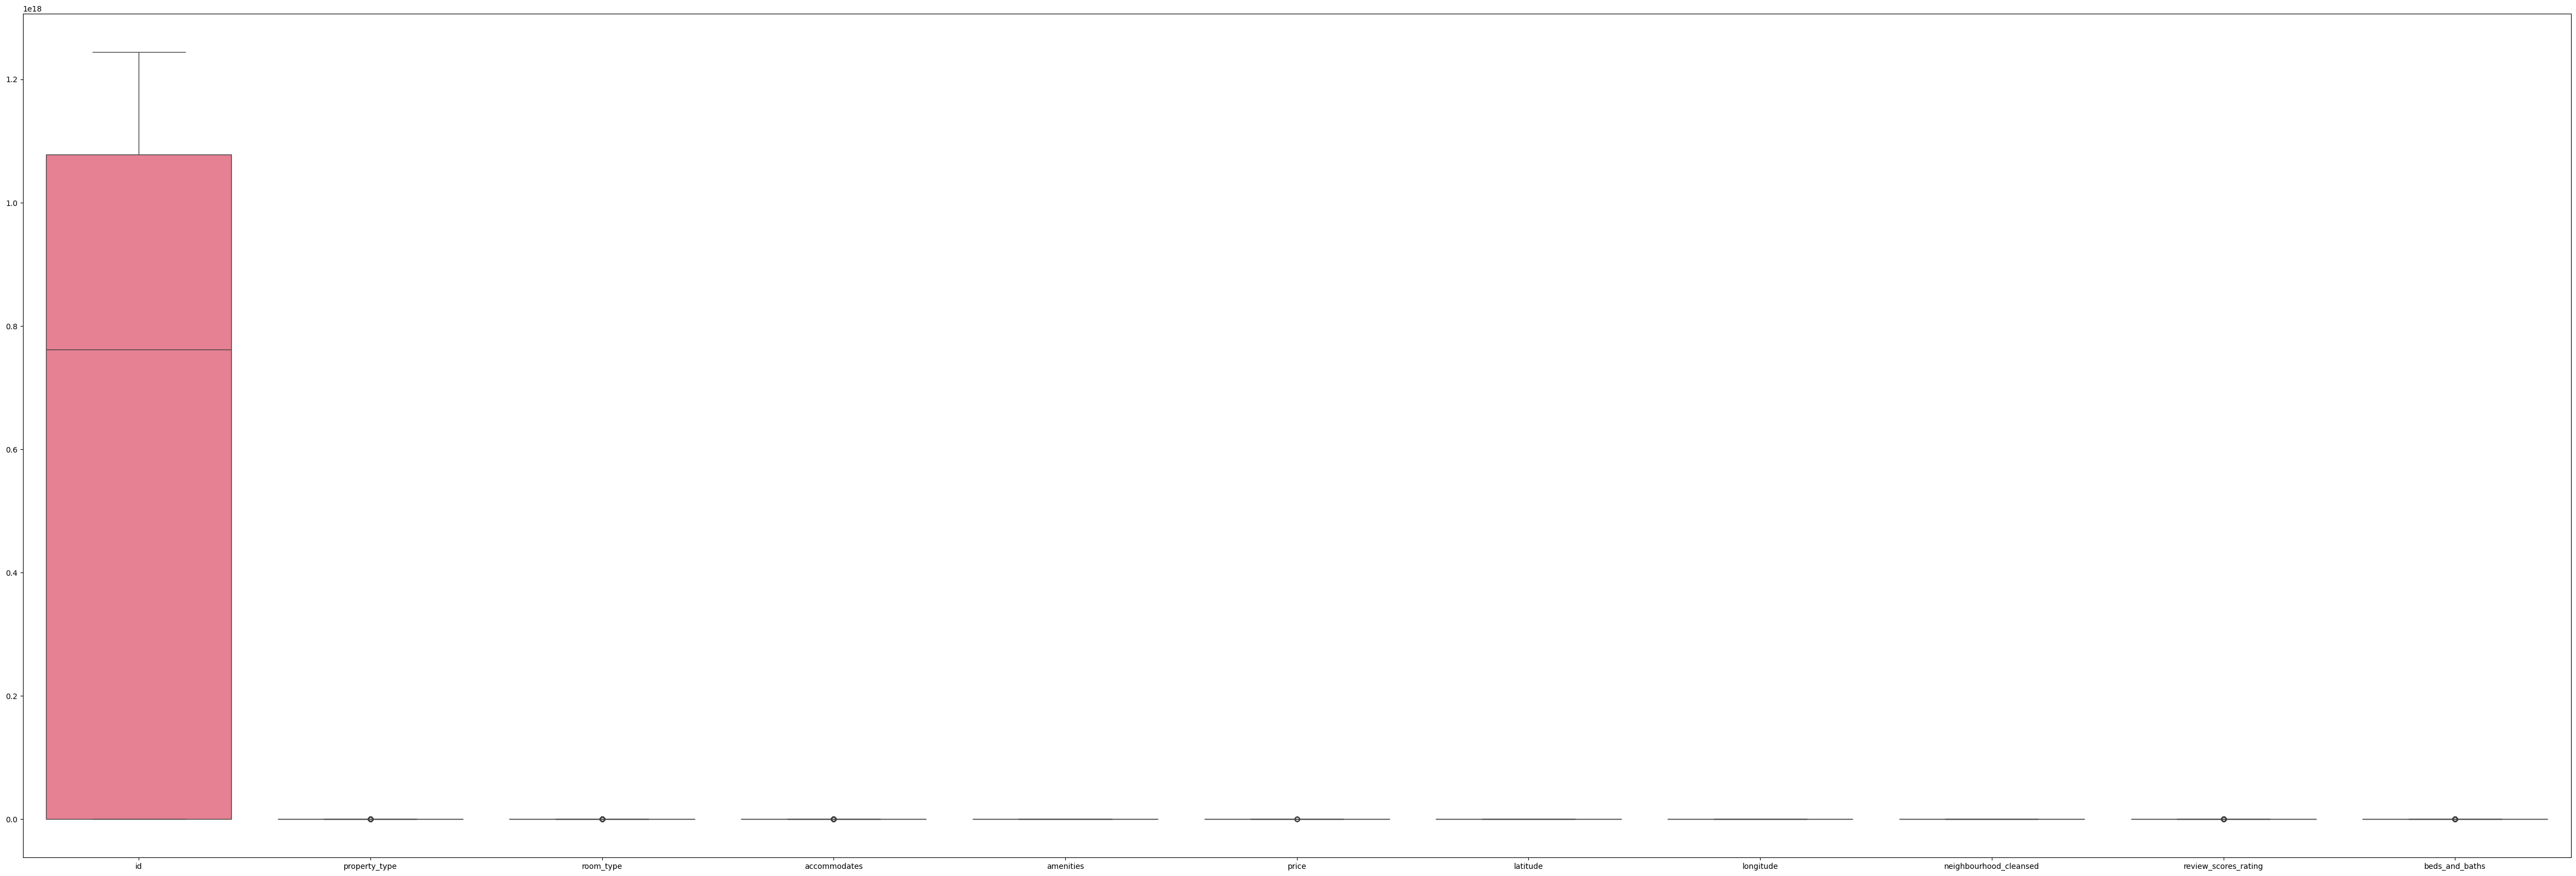

In [420]:
plt.figure(figsize=(60,20))
sns.boxplot(data=df)

In [421]:
pt = PowerTransformer(method='yeo-johnson')
df.skew()

id                       -0.193159
property_type             1.801206
room_type                 1.546400
accommodates              1.495029
amenities                -0.044490
price                    -0.463148
latitude                 -0.313842
longitude                -0.102162
neighbourhood_cleansed    0.185551
review_scores_rating     -4.352291
beds_and_baths            4.847789
dtype: float64

In [422]:
import numpy as np
from sklearn.preprocessing import PowerTransformer

cols = (df.drop(columns=['price'], axis=1)).columns
pt = PowerTransformer(method='yeo-johnson')

for x in cols:
    try:
        if df[x].abs().max() > 1e6:
            print(f"Applying log transformation to column {x} due to large values.")
            df[x] = np.log1p(df[x].abs())

        df[x] = pt.fit_transform(df[[x]])
    except Exception as e:
        print(f"Error transforming column {x}: {e}")

print(df.skew())


Applying log transformation to column id due to large values.
id                       -0.435742
property_type            -0.357033
room_type                 1.478781
accommodates              0.001763
amenities                -0.306744
price                    -0.463148
latitude                 -0.215121
longitude                -0.148291
neighbourhood_cleansed   -0.276226
review_scores_rating     -0.329433
beds_and_baths            0.010513
dtype: float64


<Axes: >

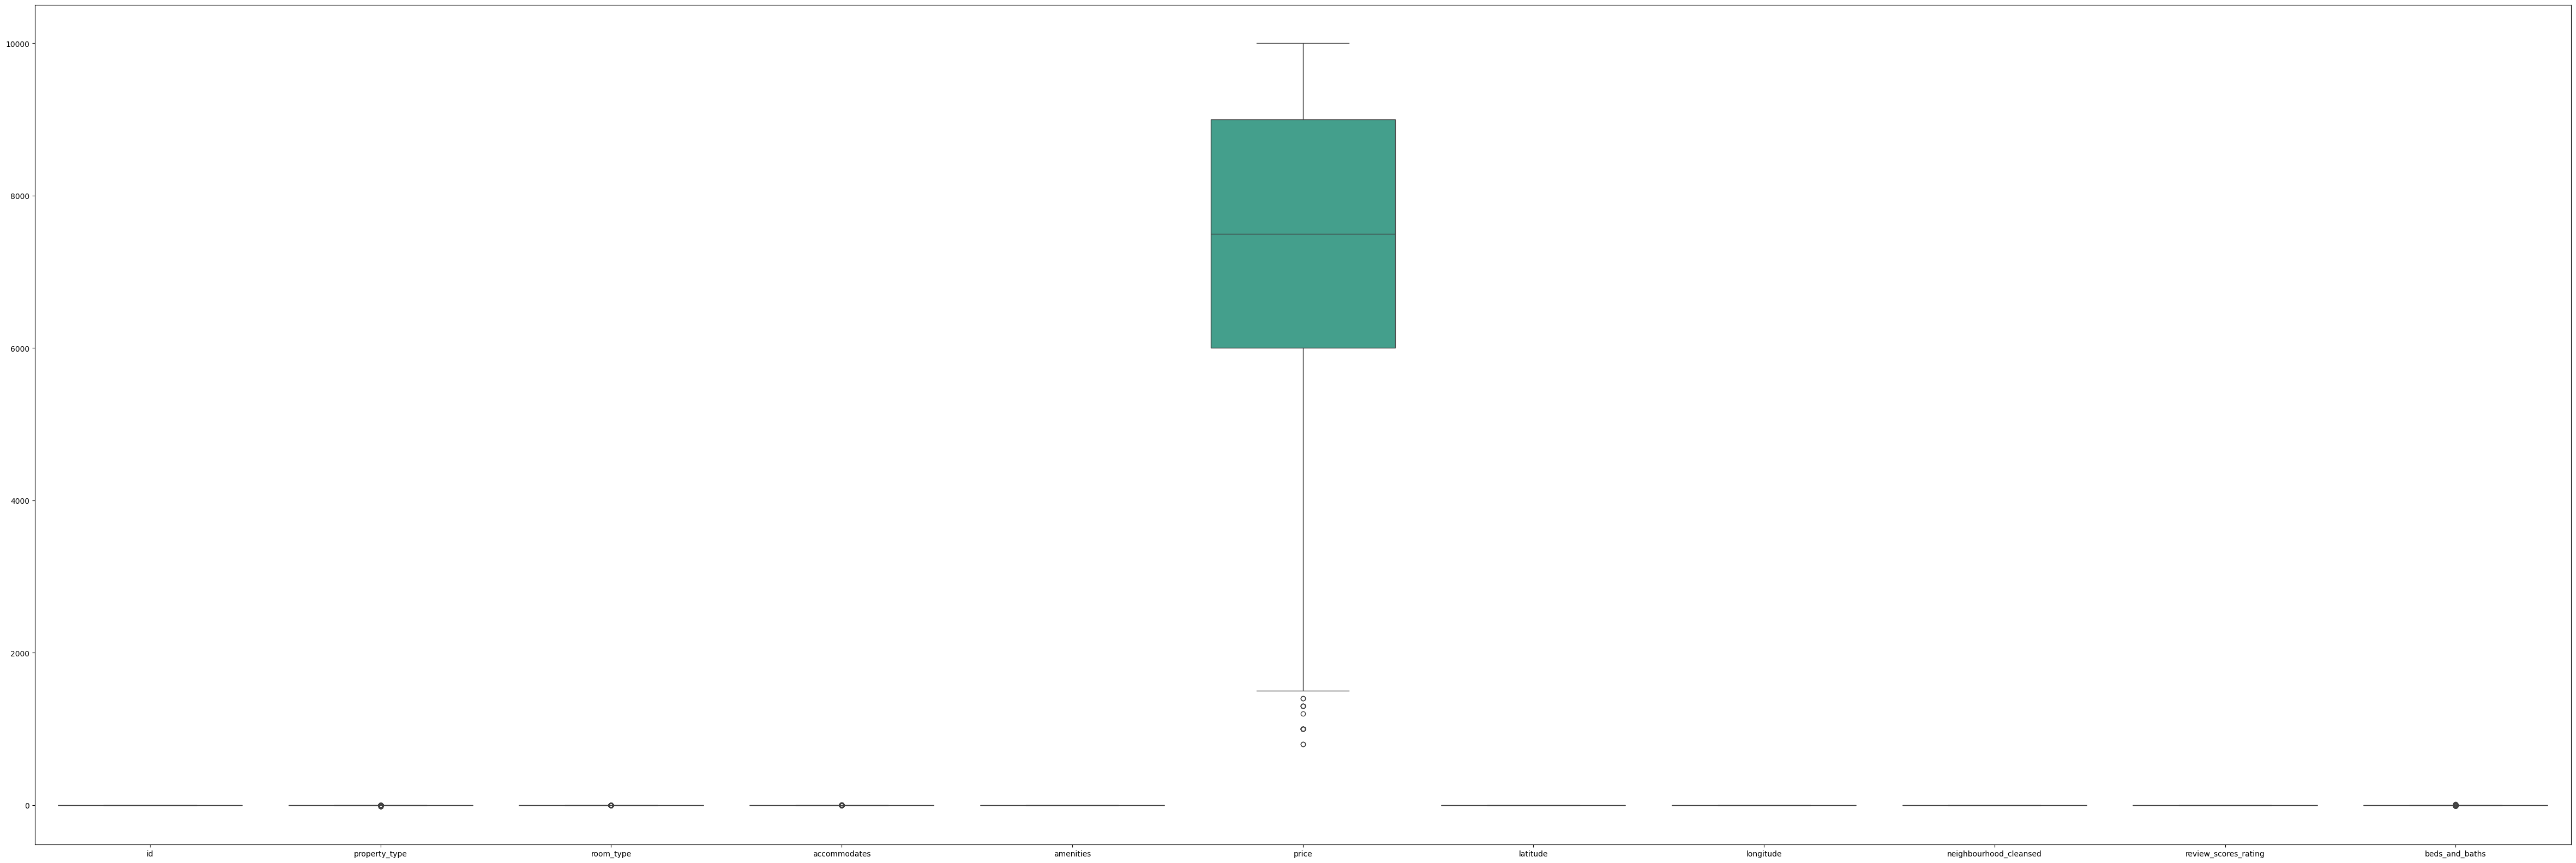

In [423]:
plt.figure(figsize=(60,20))
sns.boxplot(data=df)

In [424]:
df.isnull().sum()

id                          0
property_type               0
room_type                   0
accommodates                0
amenities                   0
price                       0
latitude                    0
longitude                   0
neighbourhood_cleansed      0
review_scores_rating        0
beds_and_baths            123
dtype: int64

In [425]:
df.dropna(subset=['beds_and_baths'],inplace=True)
df['beds_and_baths'].isnull().sum()

0

In [426]:
df['review_scores_rating'] = df['review_scores_rating'].fillna(float(int(df['review_scores_rating'].mean())))
df.isnull().sum()

id                        0
property_type             0
room_type                 0
accommodates              0
amenities                 0
price                     0
latitude                  0
longitude                 0
neighbourhood_cleansed    0
review_scores_rating      0
beds_and_baths            0
dtype: int64

In [427]:
df.drop(columns=['latitude','longitude','id'],axis=1,inplace=True)
df

,property_type,room_type,accommodates,amenities,price,neighbourhood_cleansed,review_scores_rating,beds_and_baths
0,-0.283748,-0.504292,1.286627,-0.561370,9400,0.224138,0.410761,0.119713
1,-0.283748,-0.504292,2.633743,-0.986098,10000,-0.760010,-0.829765,2.400884
2,-0.283748,-0.504292,1.759591,-0.746761,9500,-1.240655,0.645717,1.398581
3,-0.283748,-0.504292,1.286627,-0.381251,8500,-0.652159,0.707142,1.398581
4,-0.283748,-0.504292,1.286627,-0.602531,9500,1.136718,-0.289342,0.119713
...,...,...,...,...,...,...,...,...
30168,-0.283748,-0.504292,-0.372303,-1.014342,9400,0.733267,-0.255093,-1.657580
30169,-0.283748,-0.504292,-0.372303,0.419275,8300,-0.355222,-0.255093,0.119713
30170,-0.283748,-0.504292,1.286627,-1.399209,10000,-0.031280,-0.255093,0.119713
30171,-0.283748,-0.504292,1.286627,0.396581,7700,1.031037,1.385495,0.119713


In [428]:
df['price_per_room'] = df['price']/df['beds_and_baths']

In [429]:
corr = df.corr()
print(corr['price'])

property_type            -0.288119
room_type                -0.346745
accommodates              0.323735
amenities                 0.037912
price                     1.000000
neighbourhood_cleansed    0.103509
review_scores_rating      0.018180
beds_and_baths            0.086002
price_per_room            0.316131
Name: price, dtype: float64


In [430]:
Features = df.drop(columns=['price'],axis=1)
Labels = df['price']

ft, fe, lt, le = train_test_split(Features,Labels, test_size=0.2, random_state=42)

In [431]:
xg = XGBRegressor()
xg.fit(ft, lt)
pred = xg.predict(fe)
print(xg.score(fe,le))

0.9932131171226501


In [432]:
acc = cross_val_score(xg, Features, Labels, cv=KFold(n_splits=10, shuffle=True, random_state=42))
print(acc)

[0.99208081 0.99539322 0.99542278 0.9956376  0.99485457 0.99522591
 0.99567521 0.99573553 0.99297655 0.99683839]


In [433]:
r2 = r2_score(le, pred)
print(f"R²: {r2}")

mse = mean_squared_error(le, pred)
print(f"MSE: {mse}")

rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

R²: 0.9932131171226501
MSE: 24011.963783525523
RMSE: 154.95794198273776


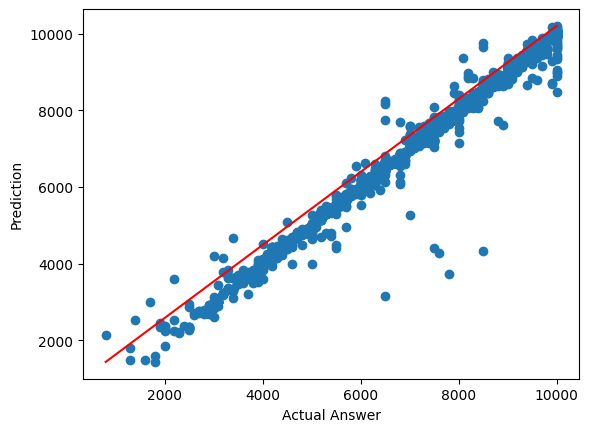

In [434]:
plt.scatter(le, pred)
plt.xlabel('Actual Answer')
plt.ylabel('Prediction')
plt.plot([min(le),max(le)],[min(pred),max(pred)],color='red')

In [435]:
# %pip install nbconvert
# !jupyter nbconvert --to script model_xgboost.ipynb

In [436]:
test_data = df.sample(n=3)
test_data

,property_type,room_type,accommodates,amenities,price,neighbourhood_cleansed,review_scores_rating,beds_and_baths,price_per_room
13191,-0.283748,-0.504292,-0.372303,-0.246109,6200,-1.756280,0.467923,0.119713,51790.496532
2044,1.939590,1.982431,1.286627,-0.789494,6000,1.219671,-1.164565,1.398581,4290.061904
15141,-0.283748,-0.504292,1.286627,0.446134,6000,-0.355222,-0.332798,0.119713,50119.835353


In [ ]:
test_data = df_test[['property_type', 'room_type', 'accommodates', 'amenities', 'neighbourhood_cleansed', 'review_scores_rating', 'beds_and_baths', 'price', 'price_per_room']].sample(n=3)
test_data

,property_type,room_type,accommodates,amenities,neighbourhood_cleansed,review_scores_rating,beds_and_baths,price,price_per_room
2371,-0.283748,-0.504292,-0.372303,-0.964194,-0.293587,-0.829765,-1.657580,4000,-2413.156884
25946,0.758364,1.982431,-0.372303,1.217150,1.460836,-1.319371,0.119713,6700,55967.149478
2436,-1.725092,-0.504292,1.286627,-0.504499,-1.240655,0.585384,1.398581,9500,6792.598014


In [438]:
test_data = test_data.drop(columns=['price'],axis=1)
predictions_python = xg.predict(test_data)
print("Prédictions en Python :", predictions_python)

Prédictions en Python : [4022.2458 6707.4214 9509.261 ]


In [439]:
# xg.save_model("xgboost_model.bin")